# Analysis for 2017-01-13 HST

In [69]:
%load_ext autoreload
%autoreload 2

from importlib import reload
from imaka.reduce.nights import reduce_2017_01_13 as redu
from imaka.analysis import plot_stats

reload(redu)
reload(plot_stats)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'imaka.analysis.plot_stats' from '/Users/jlu/code/python/imaka/imaka/analysis/plot_stats.py'>

## Date Reduction

Fully reduce the data from 20170113 HST. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga. 

In [ ]:
# Set this to whats appropriate for your machine.
redu.root_dir = '/Volumes/g/lu/data/imaka/2017_01_13/fli/'

redu.make_sky()
redu.make_flat()

# Reduce open-loop, TTF-loop closed, and closed-loop images.
redu.reduce_pleiades()

Find stars and calc stats tables. Again, be sure to load these back up to onaga.

In [ ]:
redu.find_stars_pleiades_open()
redu.find_stars_pleiades_ttf
redu.find_stars_pleiades_closed()

redu.calc_star_stats()

Stack images to make the final "deep" image for open, TTF, and closed-loop data sets. 

In [ ]:
redu.stack_pleiades_west_ttf()
redu.analyze_stacks()

## Fetch stats from onaga to local machine

All the stats files should be kept on onaga. But to sync up with this machine, you can run the following utility. You will probably need to run this in an ipython window rather than from the Jupyter notebook.


In [70]:
plot_stats.fetch_stats_from_onaga(['20170113'], '/Users/jlu/work/imaka/pleiades/')

imaka@onaga.ifa.hawaii.edu:/Volumes/DATA4/imaka/20170113/fli/reduce/stats/stats*.fits
/Users/jlu/work/imaka/pleiades//20170113/fli/reduce/stats/


## Load MASS/DIMM data.

Fetch the MASS/DIMM data and load it into the stats table. First, we will fetch the MASS/DIMM data from the MKWC. This only needs to be done once (ever). 

In [71]:
from imaka.reduce import massdimm
massdimm.fetch_data('20170114', '/Users/jlu/data/imaka/20170113/mkwc/')

Saving MASS/DIMM data to directory:
/Users/jlu/data/imaka/20170113/mkwc/


Population the stats table with matching MASS/DIMM data.

In [72]:
mkwc_dir = '/Users/jlu/data/imaka/20170113/mkwc/'

import glob

stats_tables = glob.glob('/Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats*.fits')

for stats in stats_tables:
    if 'mdp.fits' not in stats:
        print('Adding MASS/DIMM to ' + stats)
        massdimm.append_mass_dimm(stats, mkwc_dir)
    else:
        print('Skipping ' + stats)


Adding MASS/DIMM to /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_closed1.fits
Skipping /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_closed1_mdp.fits
Adding MASS/DIMM to /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_closed2.fits
Adding MASS/DIMM to /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_open1.fits
Skipping /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_open1_mdp.fits
Adding MASS/DIMM to /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_open2.fits
Adding MASS/DIMM to /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_ttf1.fits
Skipping /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_ttf1_mdp.fits
Adding MASS/DIMM to /Users/jlu/work/imaka/pleiades/20170113/fli/reduce/stats/stats_ttf2.fits


Load the resulting tables back up to onaga.

In [73]:
plot_stats.load_stats_to_onaga(['20170113'], '/Users/jlu/work/imaka/pleiades/')

scp /Users/jlu/work/imaka/pleiades//20170113/fli/reduce/stats/stats*.fits imaka@onaga.ifa.hawaii.edu:/Volumes/DATA4/imaka/20170113/fli/reduce/stats/


## Plot Statistics

Below we will make a suite of standard plots. Note the various statistics are plotted against frame number and time (UTC). Recall that we had two data sets for this night:

1. Pleiades East - FLI in East Orientation (data set suffix = 1)
2. Pleiades East - FLI in West Orientation (data set suffix = 2)

The best plots to look at are:
- Empirical FWHM vs. Time
- Radius of 50% EE vs. Time
- NEA vs. Time

The overall trend is that we are certainly seeing improvements in closed-loop. The TTF-loop isn't behaving as we would want it to.

### East Orientation

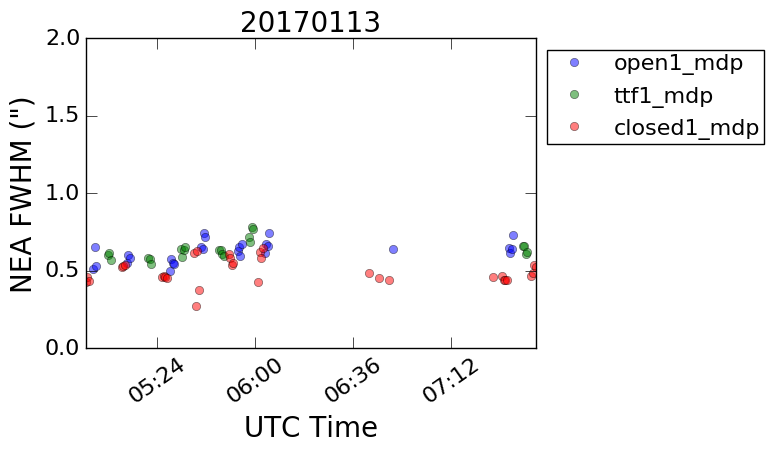

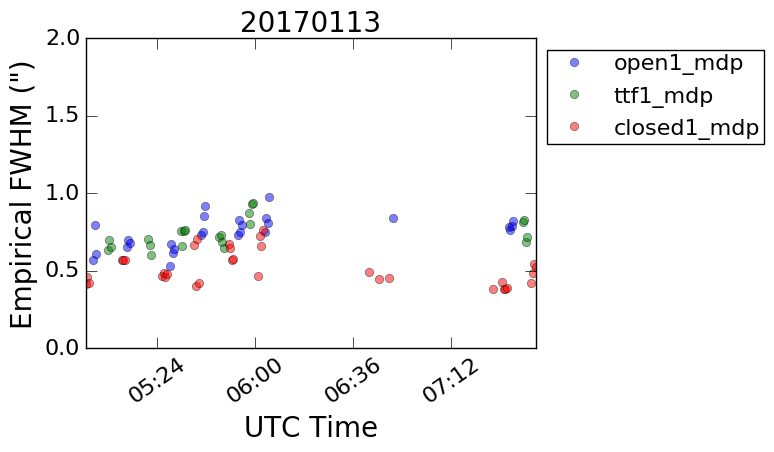

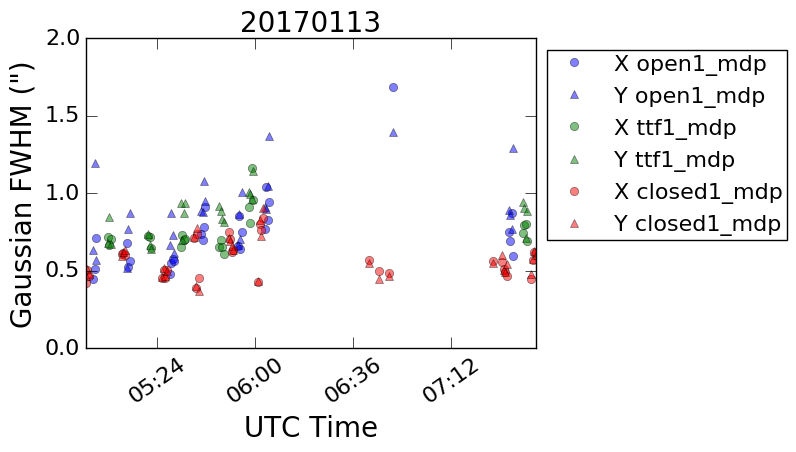

In [75]:
plot_stats.plot_best_stats('20170113', suffixes=['open1_mdp', 'ttf1_mdp', 'closed1_mdp'], root_dir='/Users/jlu/work/imaka/pleiades/')

Plot statistics including the MASS/DIMM values.

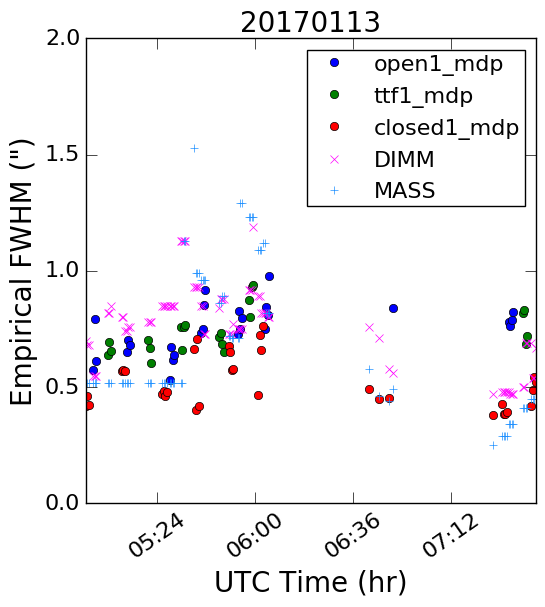

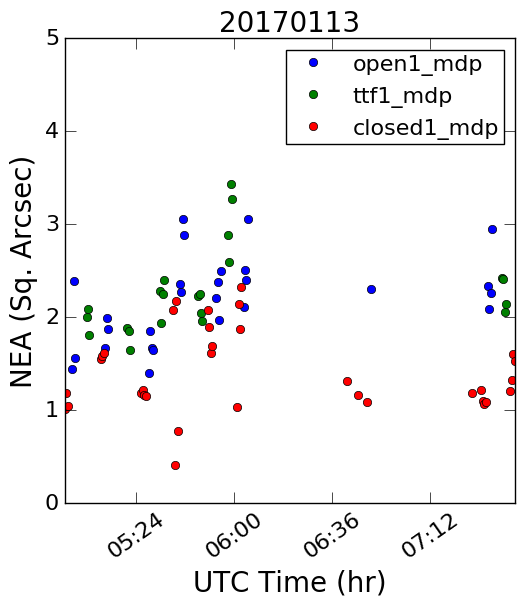

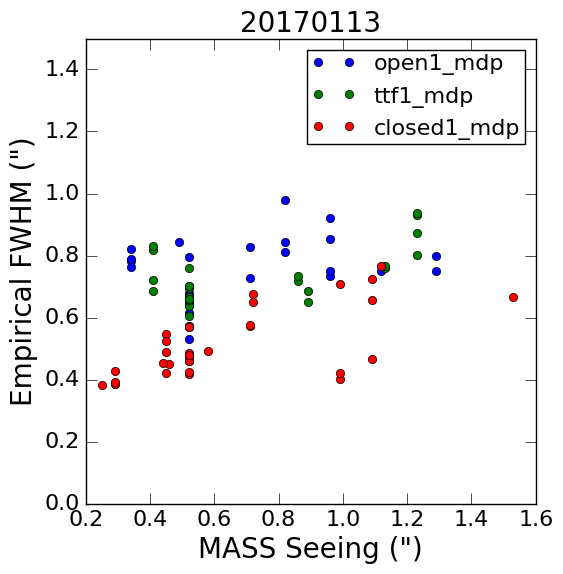

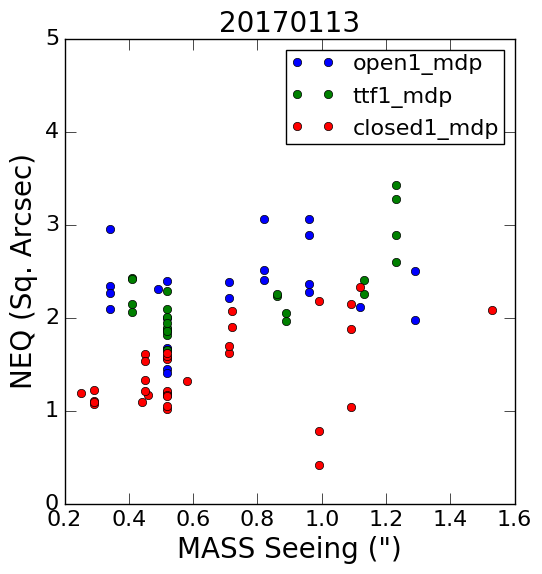

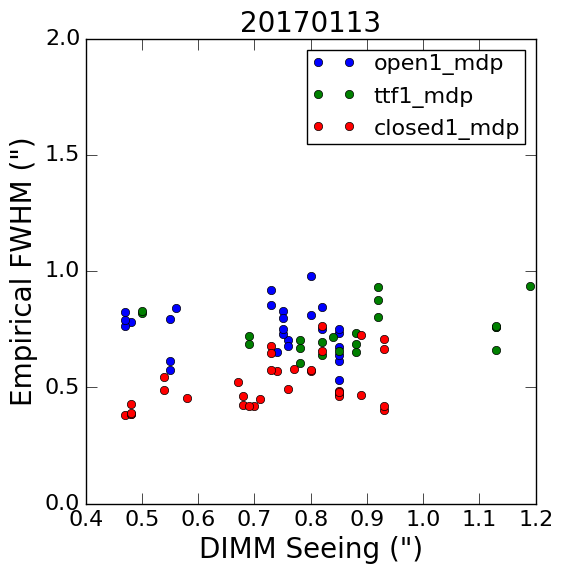

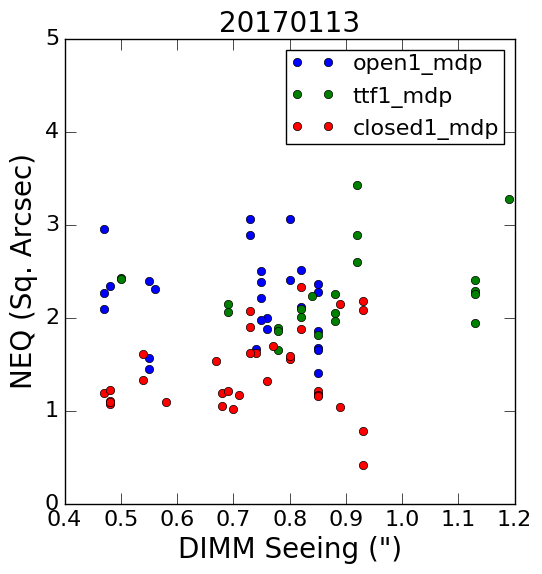

In [76]:
plot_stats.plot_stats_mdp('20170113', suffixes=['open1_mdp', 'ttf1_mdp', 'closed1_mdp'], root_dir='/Users/jlu/work/imaka/pleiades/')

### West Orientation (more stars)

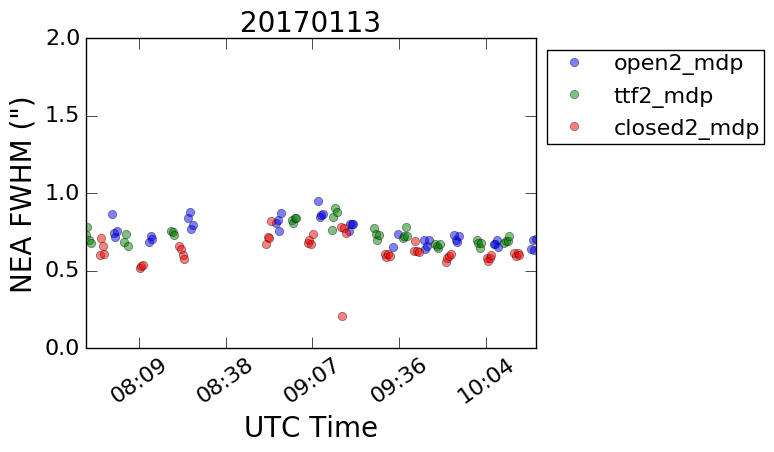

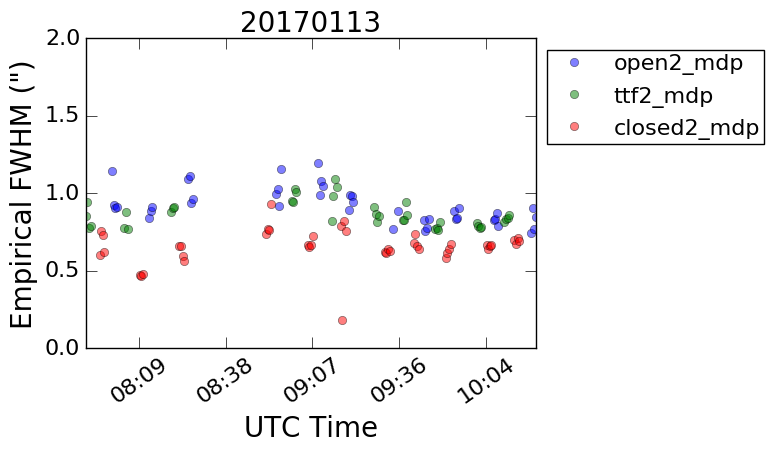

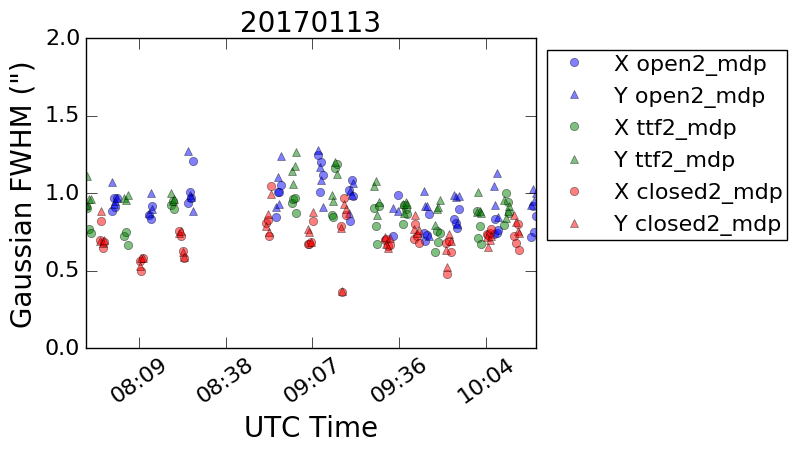

In [78]:
plot_stats.plot_best_stats('20170113', suffixes=['open2_mdp', 'ttf2_mdp', 'closed2_mdp'], root_dir='/Users/jlu/work/imaka/pleiades/')

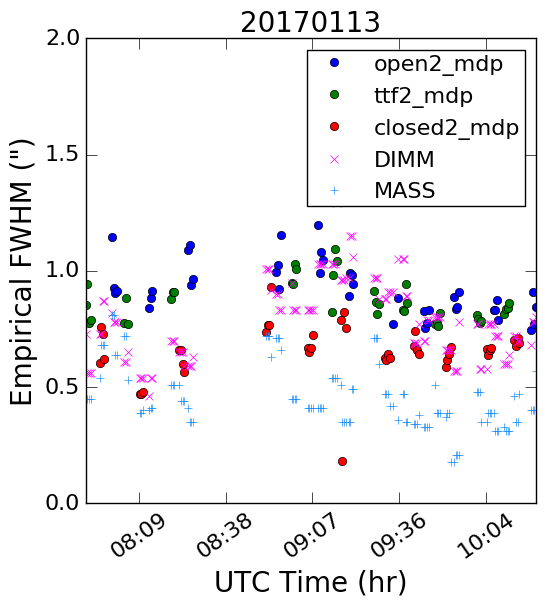

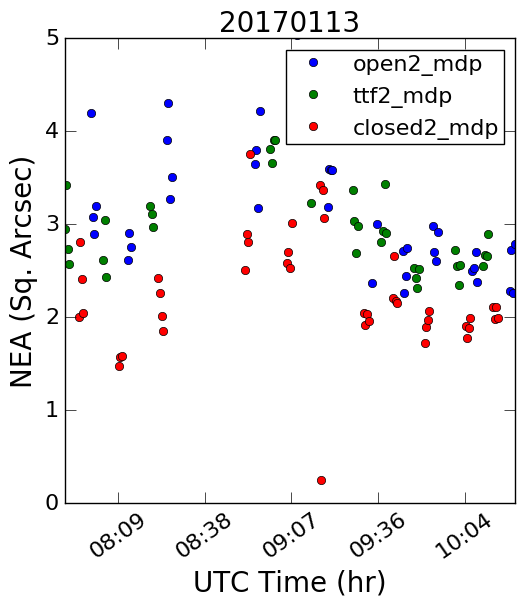

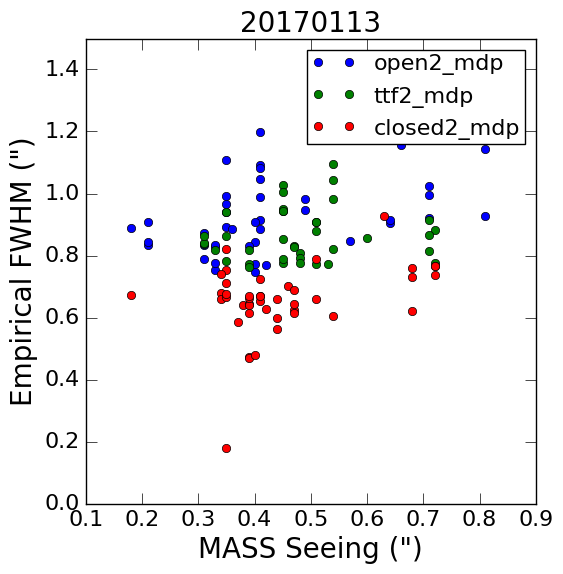

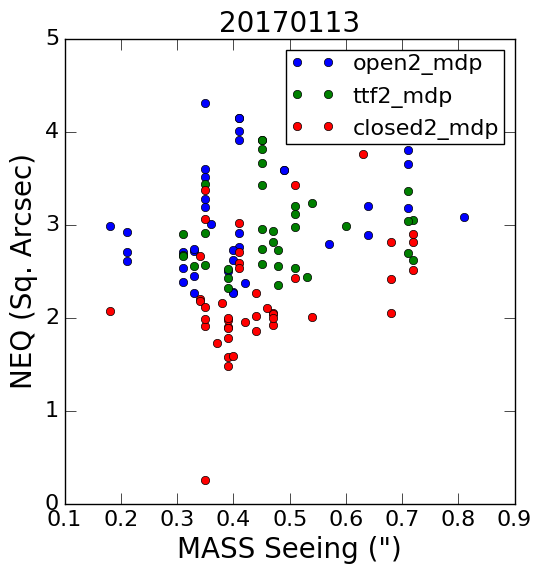

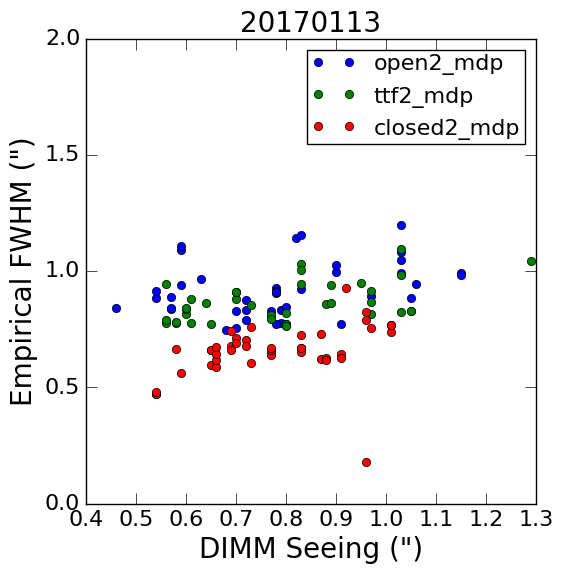

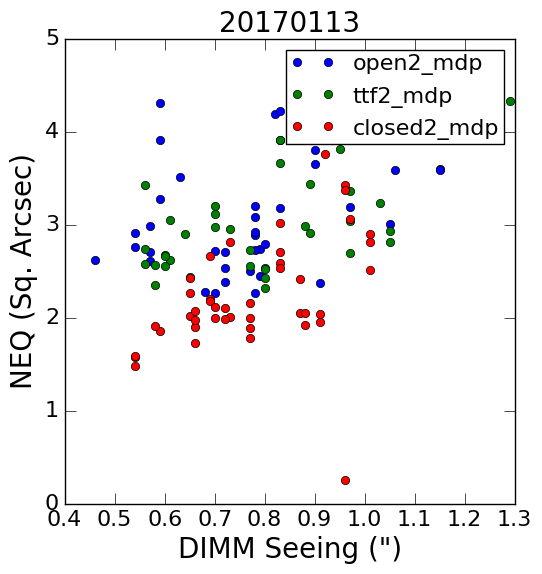

In [79]:
plot_stats.plot_stats_mdp('20170113', suffixes=['open2_mdp', 'ttf2_mdp', 'closed2_mdp'], root_dir='/Users/jlu/work/imaka/pleiades/')

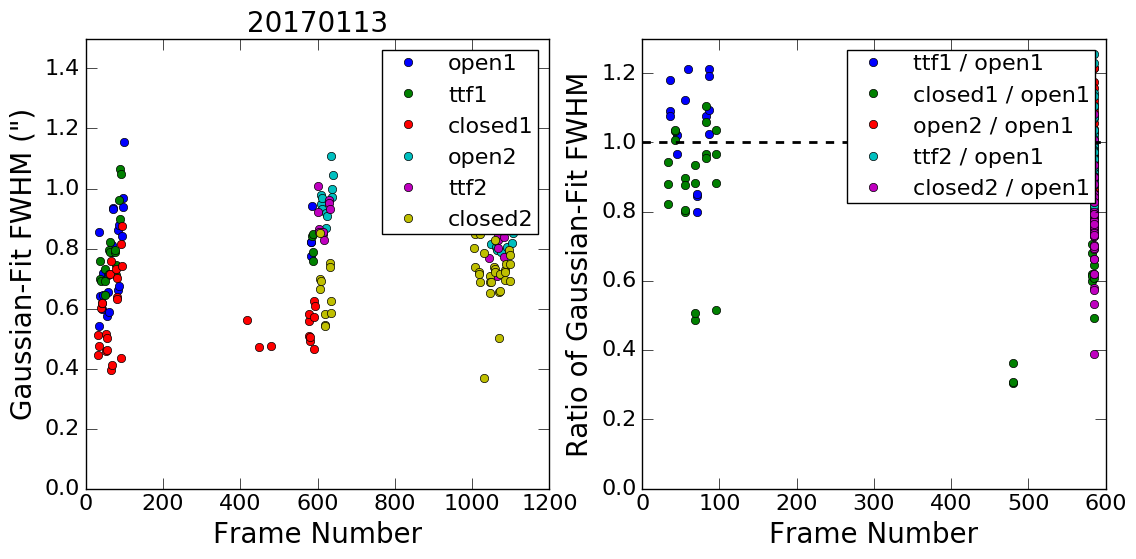

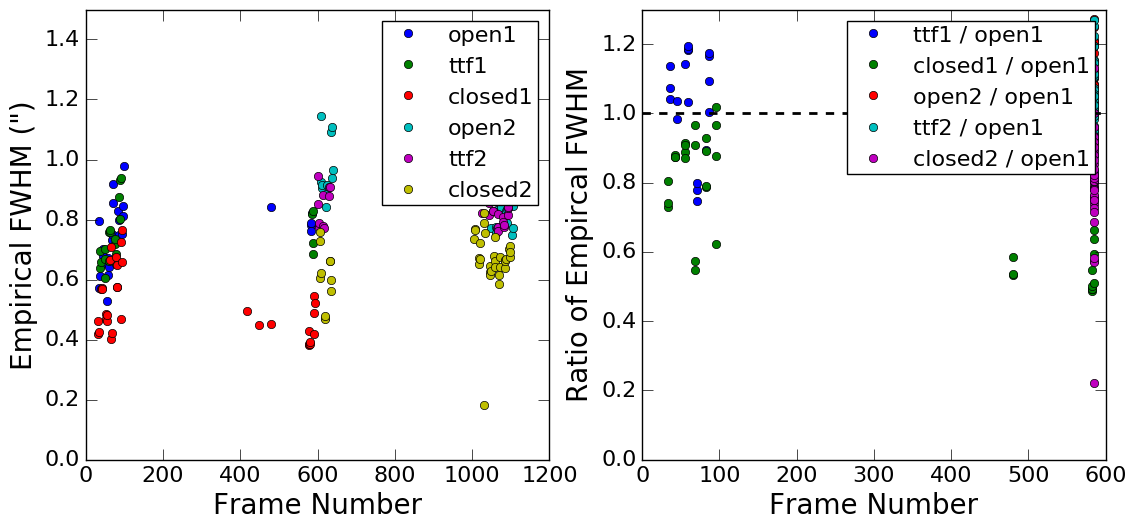

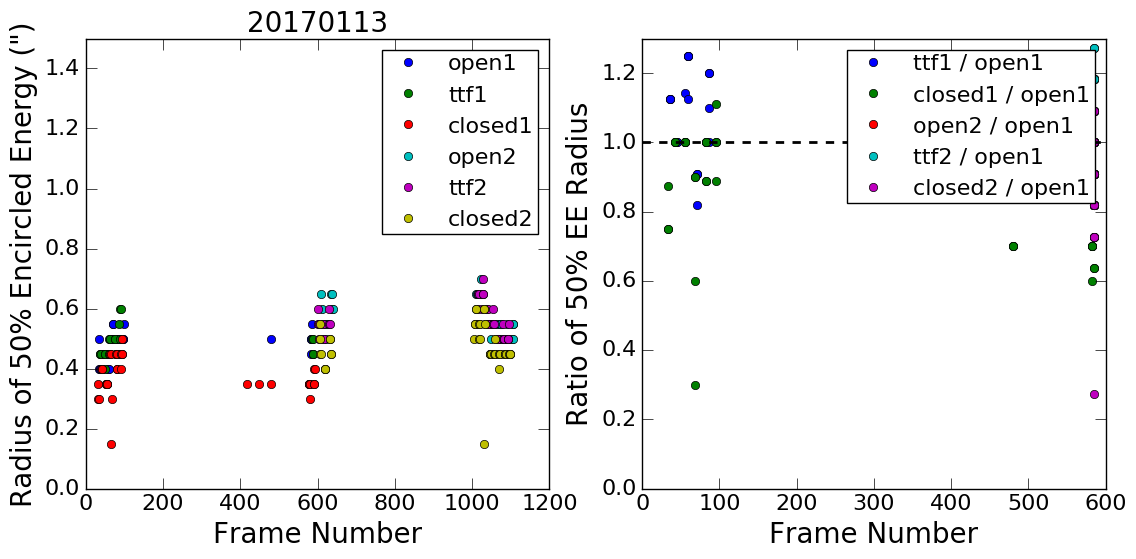

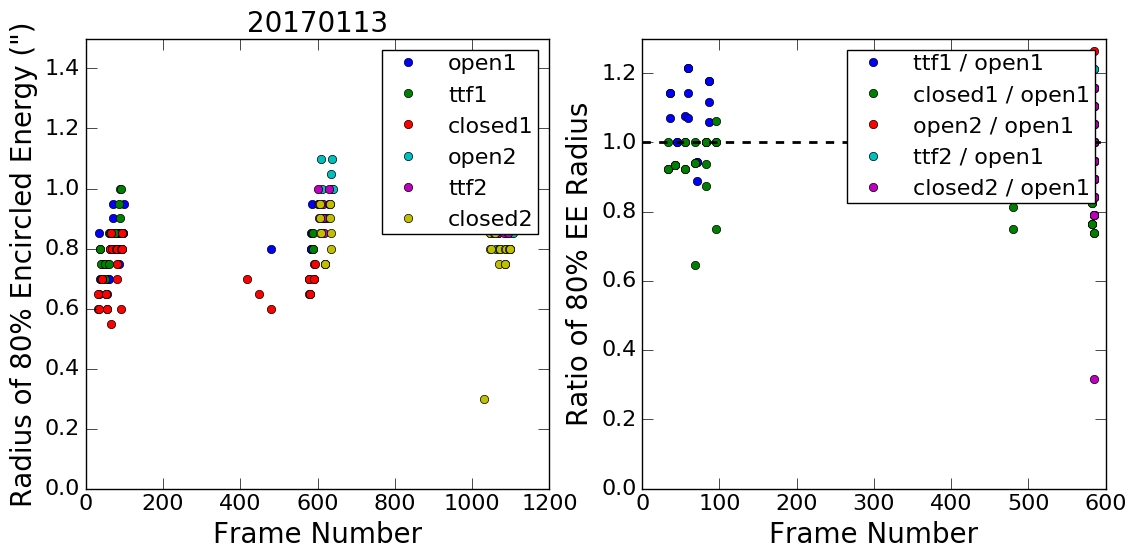

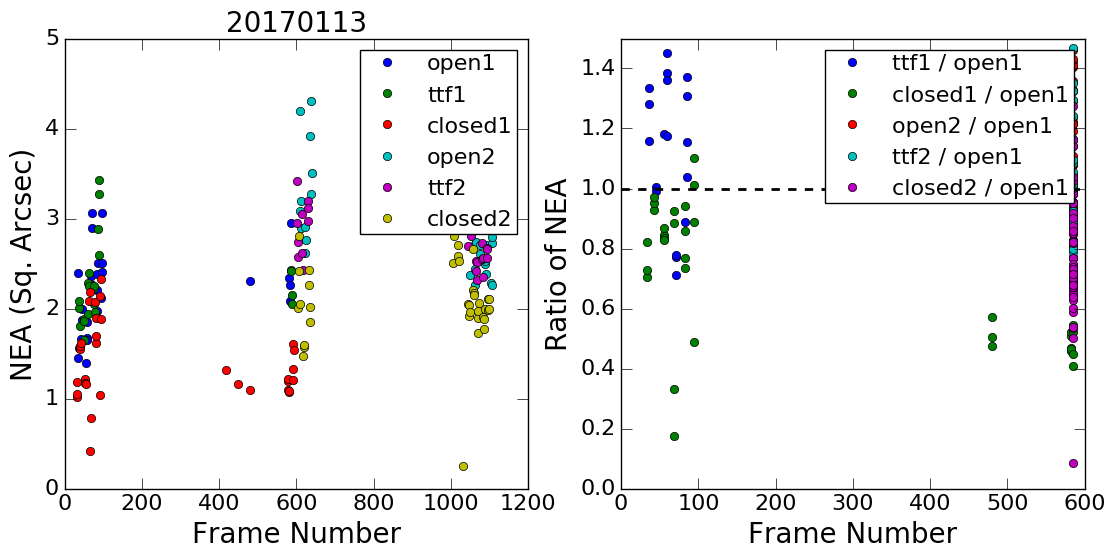

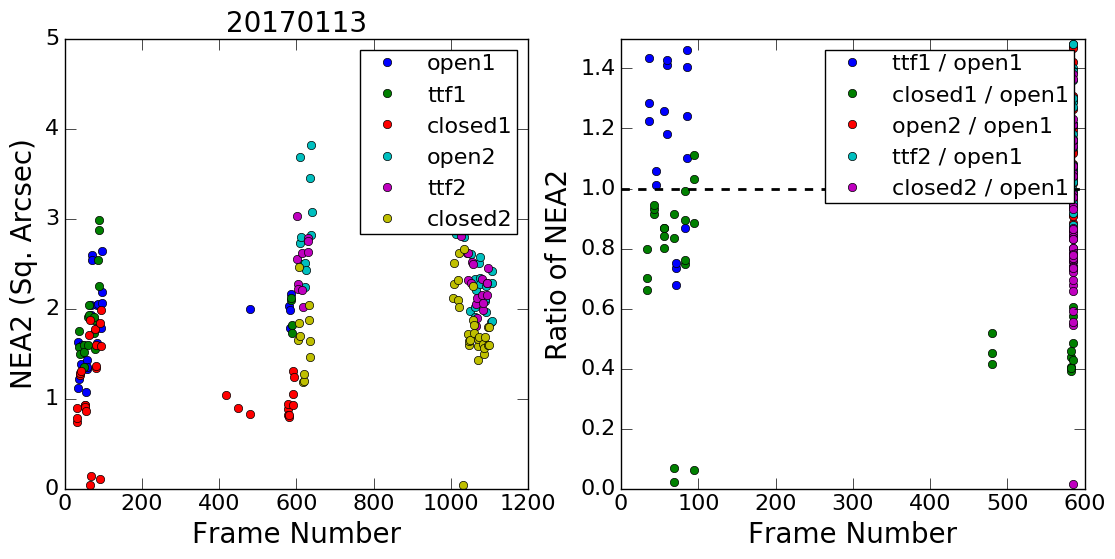

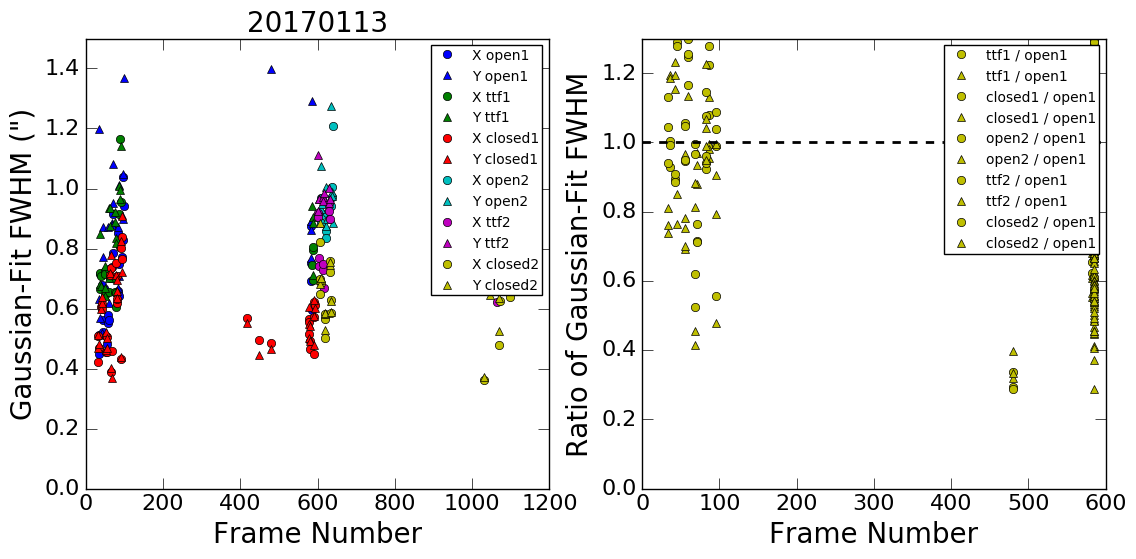

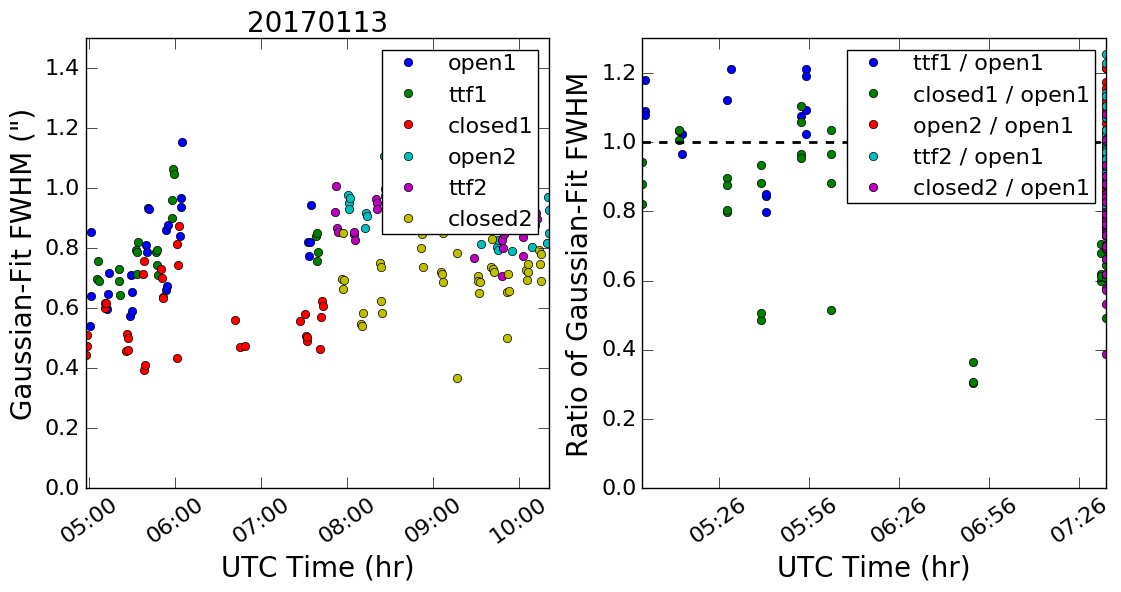

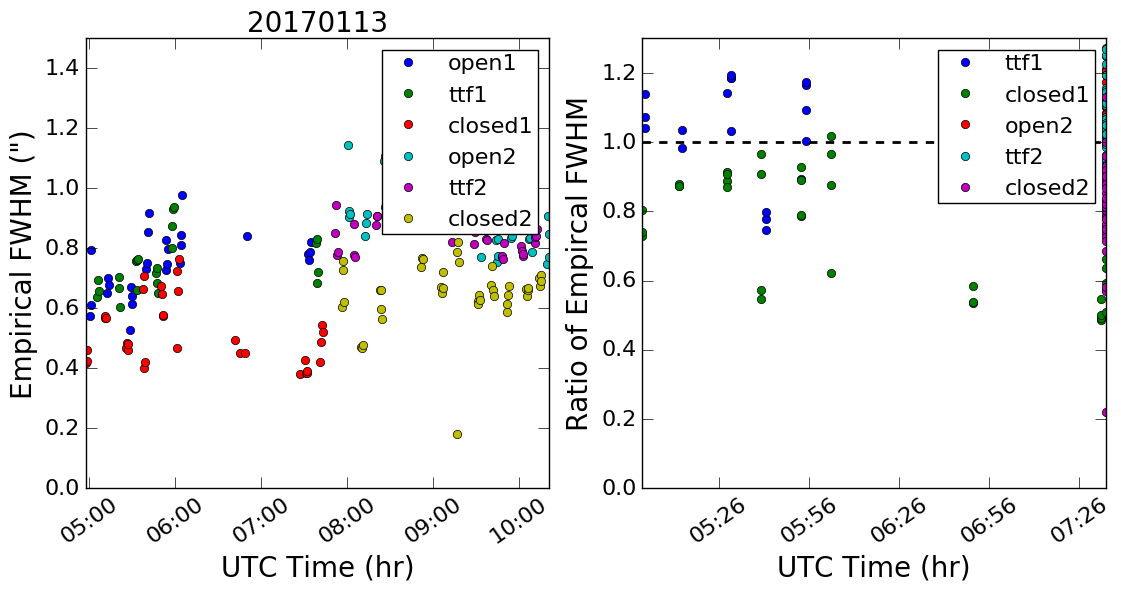

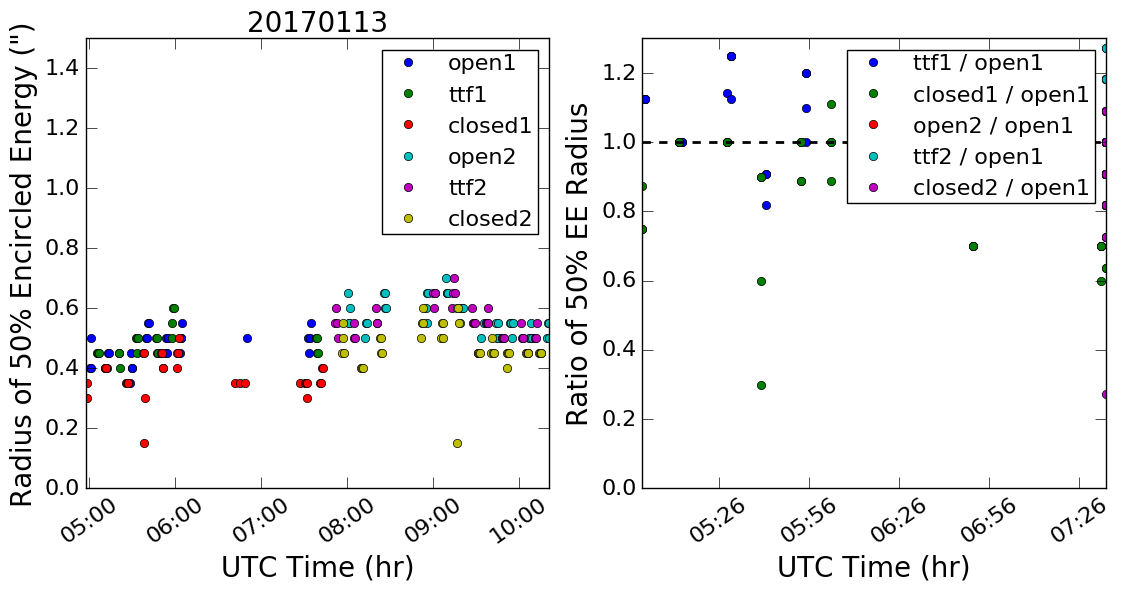

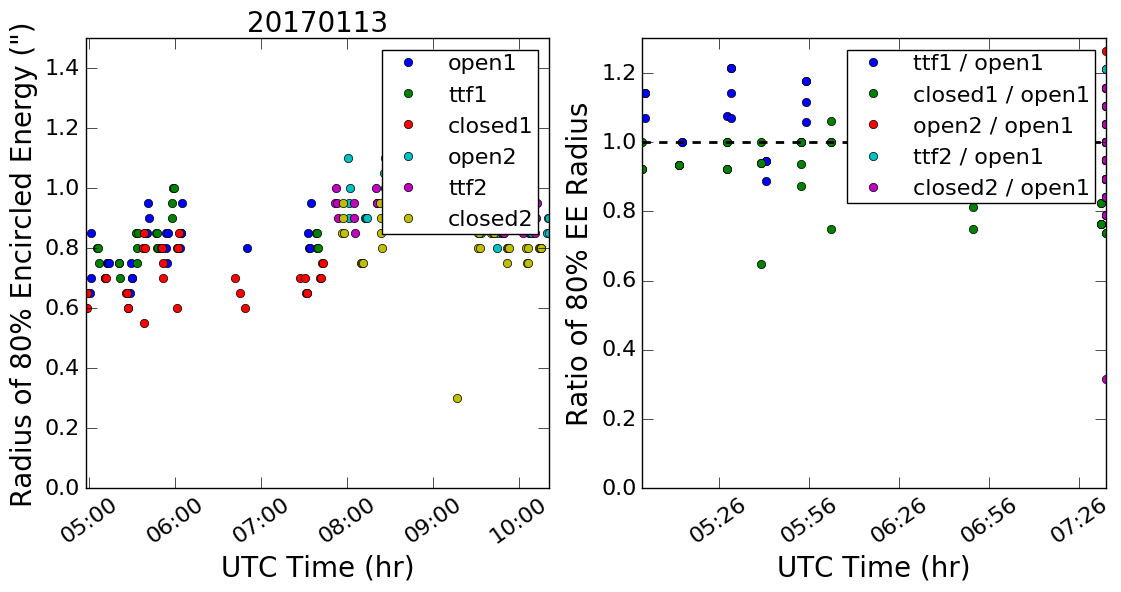

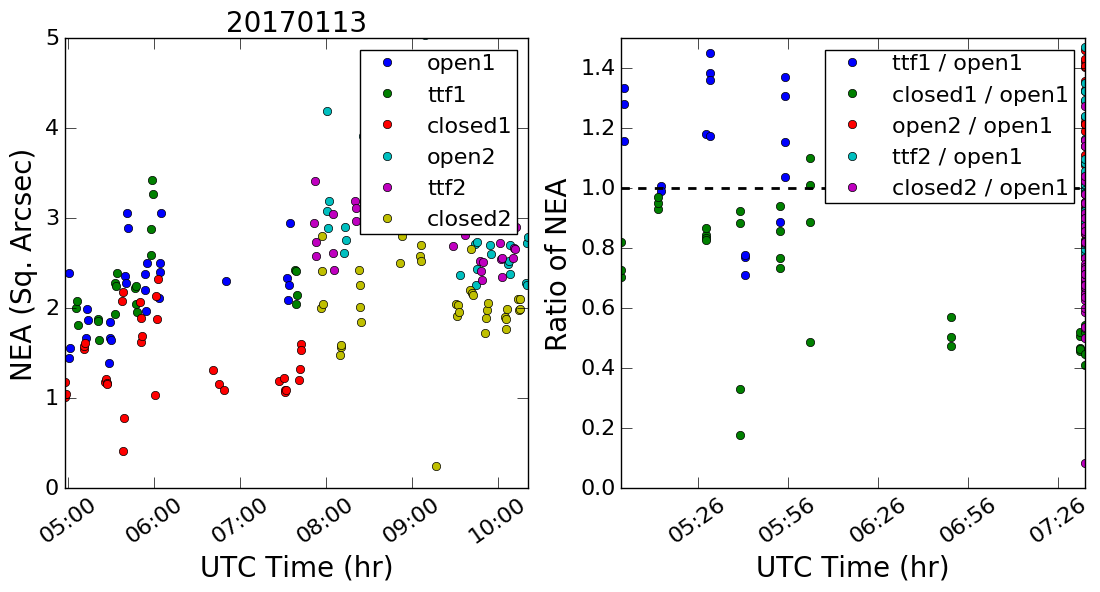

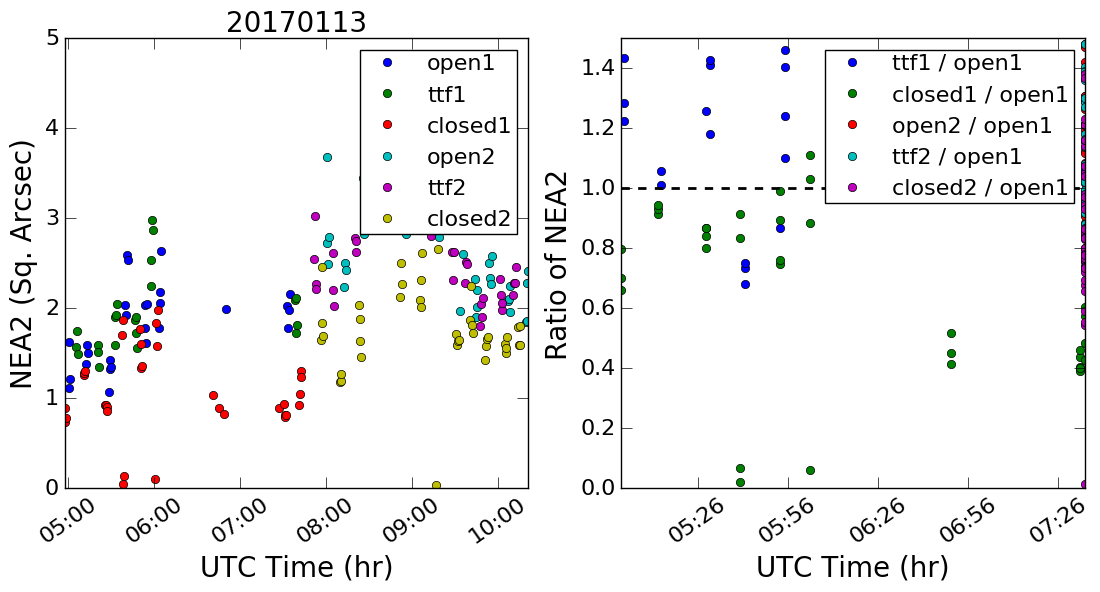

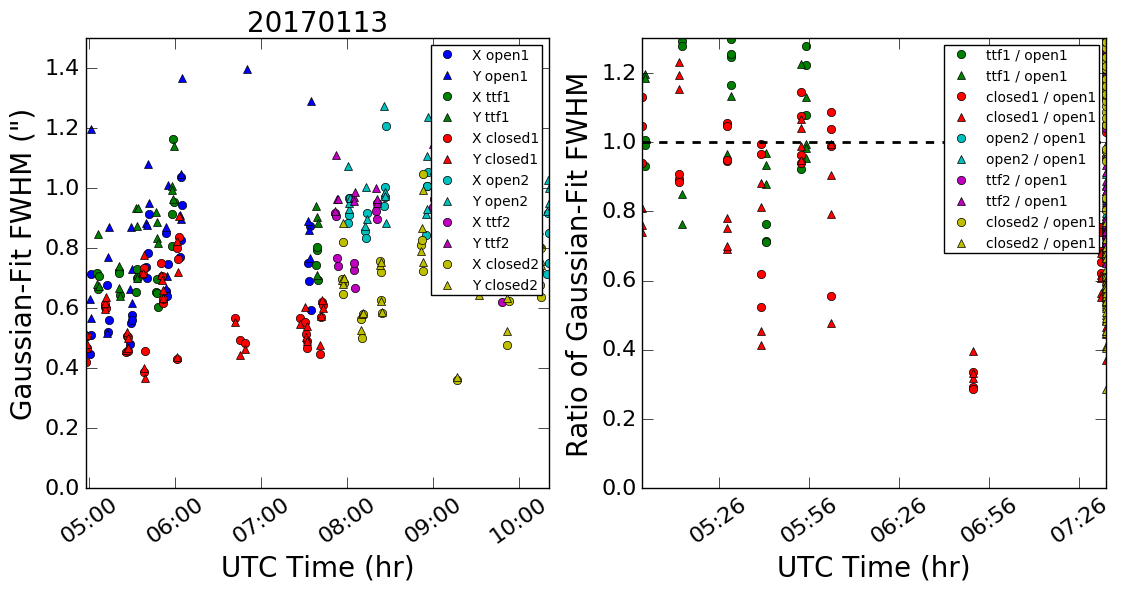

In [80]:
plot_stats.plot_stack_stats('20170113', suffixes=['open1', 'ttf1', 'closed1', 'open2', 'ttf2', 'closed2'])